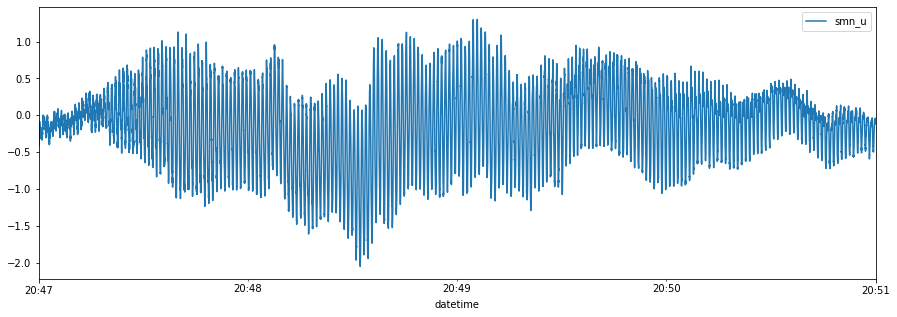

In [30]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import periodogram

from sac_tools.Sac import Sac

# File and directory names of the .sac file as well as the pole-zero file.
HDD = "TOSHIBA_HDD"
base_dir = "/Volumes/{:s}/Final Year Projects/Shinmoedake Data/shinmoedake seismographs/".format(HDD)
station = "EV.SMN"
channel = "MC"  
parent_folder = "110202/11020220h/"
file_name = os.path.join(base_dir, parent_folder, station + "." + channel)
pz_file_name = "/Volumes/{:s}/Final Year Projects/Shinmoedake Data/kirishima_invert/tri120p".format(HDD)

# Set the time range for the data.
#starttime = pd.to_datetime("20110202 20:43:40")
#endtime = pd.to_datetime("20110202 20:55:00")
starttime = pd.to_datetime("20110202 20:47:00")
endtime = pd.to_datetime("20110202 20:51:00")

# read .sac file containing harmonic tremor.
ht = Sac(file_name)   

# load seismometer response.
ht.read_pz_file(pz_file_name)

df = ht.make_df(start_time = starttime, end_time = endtime, column_name = "smn_u")

df.plot(figsize = (15, 5))
plt.show()

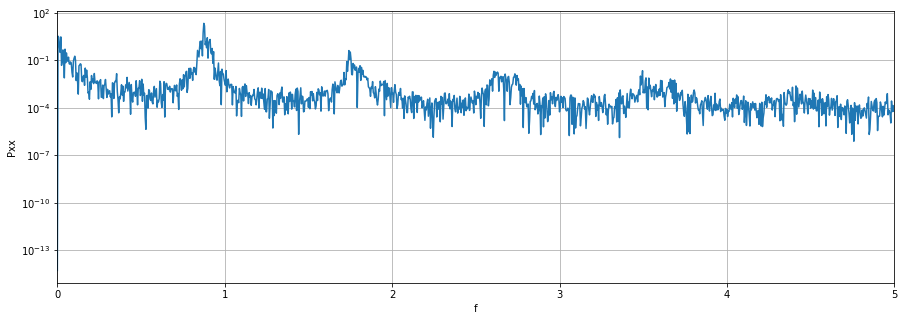

In [31]:
f, Pxx = periodogram(df.values[:, 0], fs = 100)

plt.figure(figsize = (15, 5))
plt.semilogy(f, Pxx)
plt.xlabel("f")
plt.ylabel("Pxx")
plt.grid(True)
plt.xlim([0, 5])
plt.show()